In [9]:
import numpy as np

In [18]:
from matplotlib import pyplot as plt

In [10]:
import pandas as pd

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx*(1-sx)

(784, 42000)
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


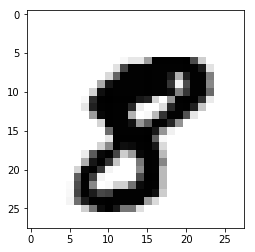

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [33]:
data = pd.read_csv("C:\\Users\\Sushant\\Documents\\DeepL\\train.csv")
data = data.values.T
X = data[1:]/255
m = X.shape[1]
Y = np.zeros((m,10))
for i in range(m):
    Y[i][data[0][i]] = 1
print(X.shape)
print(Y)
sample = X[:,10].reshape((28,28))
plt.imshow(sample, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print(Y[10])

In [42]:
layers_size = [784, 15, 10]
L = len(layers_size)-1
W = dict()
b = dict()
np.random.seed(1)
for i in range(1, L+1):
    W[str(i)] = np.random.randn(layers_size[i], layers_size[i-1])*0.01
    b[str(i)] = np.random.randn(layers_size[i], 1)*0.01
    assert(W[str(i)].shape == (layers_size[i], layers_size[i-1]))

print(W)
print(b)

{'1': array([[ 1.62434536e-02, -6.11756414e-03, -5.28171752e-03, ...,
        -1.10657307e-02, -3.59224096e-03,  5.05381903e-03],
       [ 1.21794090e-02, -1.94068096e-02, -8.06178212e-03, ...,
         2.07229946e-03, -1.43403073e-02,  6.26906306e-03],
       [ 2.99825202e-03, -1.85664142e-02, -2.15104316e-02, ...,
        -1.95419182e-02,  1.86223746e-03, -3.82994307e-05],
       ...,
       [-5.14355208e-03, -7.99751514e-03, -8.18132121e-03, ...,
         8.33959618e-03, -4.22625640e-04,  1.48629738e-02],
       [ 3.26005886e-03,  1.30370710e-02,  7.26861507e-03, ...,
         3.94682088e-03,  1.55053524e-03, -1.04178960e-02],
       [-1.10957011e-02, -3.86176998e-03,  8.19329273e-03, ...,
         1.06964762e-02, -9.35939292e-03, -3.65112120e-03]]), '2': array([[ 7.50577283e-03, -1.63018204e-03, -1.02798218e-03,
        -4.40975238e-03, -2.79072638e-03, -3.81448669e-03,
        -2.40762391e-03, -1.26910206e-02,  1.54084518e-02,
         8.20218484e-04, -1.46698104e-02,  6.12034084e

In [43]:
print(m)

42000


In [54]:
Z = dict()
A = dict()
learning_rate = 0.1
iterations = 50000
for i in range(iterations):
    
    #Forward Propagation
    A['0'] = X
    for j in range(1,L+1):
        Z[str(j)] = np.dot(W[str(j)], A[str(j-1)]) + b[str(j)]
        A[str(j)] = sigmoid(Z[str(j)])
        assert(A[str(j)].shape == (layers_size[j], m))
    
    
    
    cost = (-1/m)*np.sum((np.log(A[str(L)])*Y.T)+(np.log(1-A[str(L)])*(1-Y.T)))
    if i % 100 == 0:
        print("Cost after "+str(i)+" iterations is "+str(cost))
    
    #Back Propagation
    dZ = dict()
    dW = dict()
    db = dict()
    
    for j in reversed(range(1, L+1)):
        if j == L:
            dZ[str(j)] = A[str(j)]-Y.T
        else:
            dZ[str(j)] = np.dot(W[str(j+1)].T, dZ[str(j+1)])*sigmoid_derivative(Z[str(j)])
        
        dW[str(j)] = (1/m)*np.dot(dZ[str(j)], A[str(j-1)].T)
        db[str(j)] = (1/m)*np.sum(dZ[str(j)], axis=1, keepdims=True)
        
        assert(dW[str(j)].shape == W[str(j)].shape)
        
        W[str(j)] = W[str(j)] - learning_rate*dW[str(j)]
        b[str(j)] = b[str(j)] - learning_rate*db[str(j)]
    
print(A[str(L)])
    

Cost after 0 iterations is 0.6416174220696566
Cost after 100 iterations is 0.6349240307343308
Cost after 200 iterations is 0.6285703043255525
Cost after 300 iterations is 0.6225276266033204
Cost after 400 iterations is 0.6167704464422935
Cost after 500 iterations is 0.6112758912468788
Cost after 600 iterations is 0.606023435640631
Cost after 700 iterations is 0.60099461743587
Cost after 800 iterations is 0.5961727941389737
Cost after 900 iterations is 0.5915429342307836
Cost after 1000 iterations is 0.5870914382040184
Cost after 1100 iterations is 0.5828059848846963
Cost after 1200 iterations is 0.5786753989760887
Cost after 1300 iterations is 0.5746895361165657
Cost after 1400 iterations is 0.5708391821084619
Cost after 1500 iterations is 0.5671159634052536
Cost after 1600 iterations is 0.563512266456952
Cost after 1700 iterations is 0.5600211640876068
Cost after 1800 iterations is 0.5566363476608688
Cost after 1900 iterations is 0.5533520643108789
Cost after 2000 iterations is 0.5501

In [55]:
result1 = np.argmax(A[str(L)].T, axis=1)
result2 = np.argmax(Y, axis=1)
cnt = 0
for i in range(m):
    if result1[i] == result2[i]:
        cnt += 1
print("Accuracy", cnt/m)

Accuracy 0.9402619047619047
